In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Datasets/Predictive Maintenance-20250617T101207Z-1-001/Predictive Maintenance/Predictive_Maintenance_Data.csv')
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,90501,L53310-90501,L,300.697538,310.219698,1506.952744,39.318076,119,1.0,0,False,1,0,0
1,87704,L56591-87704,L,299.843397,309.193370,1411.467417,48.388803,203,1.0,0,False,1,0,0
2,78998,M19579-78998,M,304.228392,314.057834,1650.031129,35.128204,189,1.0,0,False,1,0,0
3,40590,L51508-40590,L,299.673601,310.638137,1330.488549,47.255826,80,1.0,0,False,1,0,0
4,34242,L52450-34242,L,304.645486,314.486364,1269.718081,64.618653,115,1.0,0,False,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100196,6266,L53445,L,300.800000,310.300000,1383.000000,46.600000,19,0.0,0,0,0,0,0
100197,54887,L53901-54887,L,300.851066,310.779621,1266.964120,63.515266,103,1.0,0,False,1,0,0
100198,76821,L53815-76821,L,301.346005,310.737198,1548.140480,35.433975,122,1.0,0,False,1,0,0
100199,861,H30274,H,296.100000,306.900000,1541.000000,32.600000,33,0.0,0,0,0,0,0


In [ ]:
df.isnull().sum()

,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Machine failure,0
TWF,0


In [ ]:
df.select_dtypes(include='object').columns

Index(['Product ID', 'Type', 'HDF'], dtype='object')

In [ ]:
#product id is not related for prediction
df.drop('Product ID' , axis=1 , inplace=True)


In [ ]:
df

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,90501,L,300.697538,310.219698,1506.952744,39.318076,119,1.0,0,False,1,0,0
1,87704,L,299.843397,309.193370,1411.467417,48.388803,203,1.0,0,False,1,0,0
2,78998,M,304.228392,314.057834,1650.031129,35.128204,189,1.0,0,False,1,0,0
3,40590,L,299.673601,310.638137,1330.488549,47.255826,80,1.0,0,False,1,0,0
4,34242,L,304.645486,314.486364,1269.718081,64.618653,115,1.0,0,False,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100196,6266,L,300.800000,310.300000,1383.000000,46.600000,19,0.0,0,0,0,0,0
100197,54887,L,300.851066,310.779621,1266.964120,63.515266,103,1.0,0,False,1,0,0
100198,76821,L,301.346005,310.737198,1548.140480,35.433975,122,1.0,0,False,1,0,0
100199,861,H,296.100000,306.900000,1541.000000,32.600000,33,0.0,0,0,0,0,0


In [ ]:
#the columns type and hdf are ordinal data so we use Label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Type']=le.fit_transform(df['Type'])
df['HDF']=le.fit_transform(df['HDF'])

In [ ]:

df

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,90501,1,300.697538,310.219698,1506.952744,39.318076,119,1.0,0,2,1,0,0
1,87704,1,299.843397,309.193370,1411.467417,48.388803,203,1.0,0,2,1,0,0
2,78998,2,304.228392,314.057834,1650.031129,35.128204,189,1.0,0,2,1,0,0
3,40590,1,299.673601,310.638137,1330.488549,47.255826,80,1.0,0,2,1,0,0
4,34242,1,304.645486,314.486364,1269.718081,64.618653,115,1.0,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100196,6266,1,300.800000,310.300000,1383.000000,46.600000,19,0.0,0,0,0,0,0
100197,54887,1,300.851066,310.779621,1266.964120,63.515266,103,1.0,0,2,1,0,0
100198,76821,1,301.346005,310.737198,1548.140480,35.433975,122,1.0,0,2,1,0,0
100199,861,0,296.100000,306.900000,1541.000000,32.600000,33,0.0,0,0,0,0,0


In [ ]:
#correlation matrix
corr_mat=df.corr()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


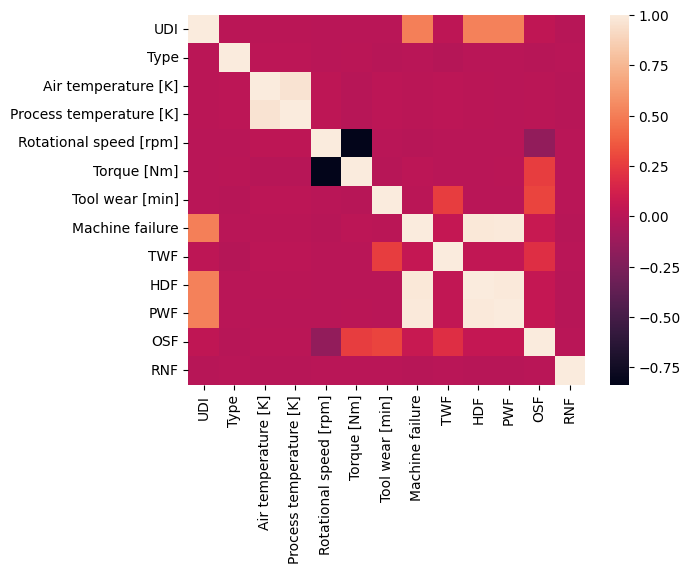

In [ ]:
corr_map=sns.heatmap(corr_mat)
plt.show(corr_map)

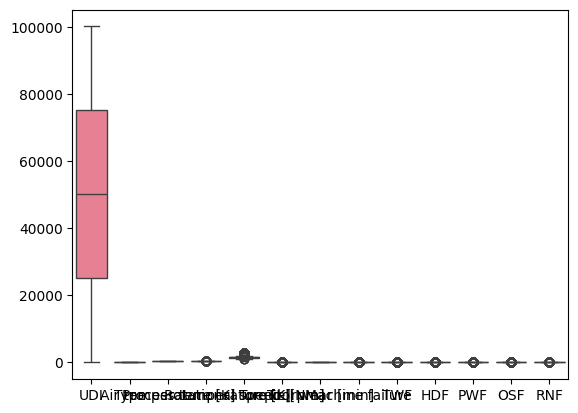

In [ ]:
#main features are HDF and PWF and UDI
#find outliers
sns.boxplot(df)
plt.show()

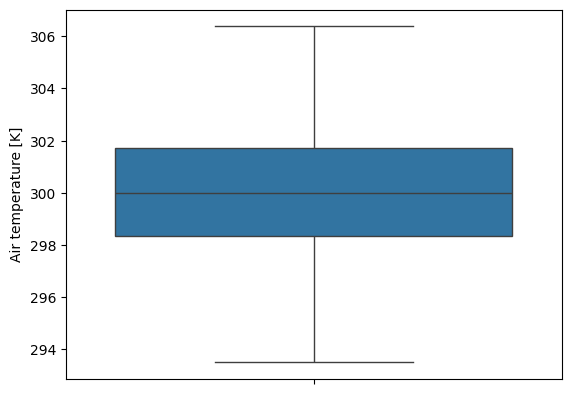

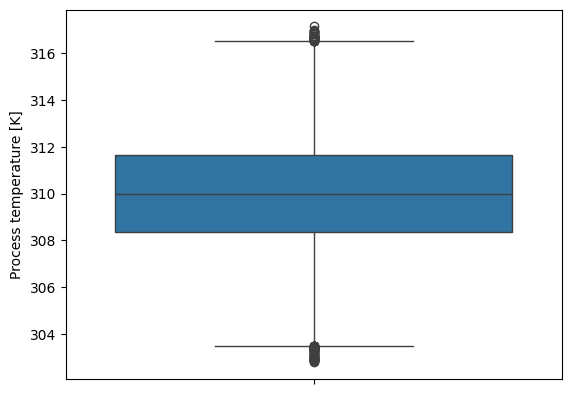

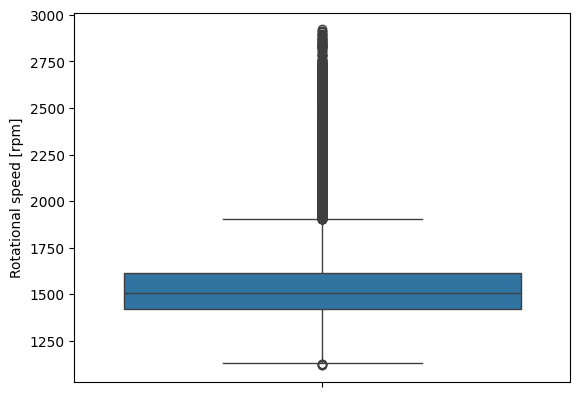

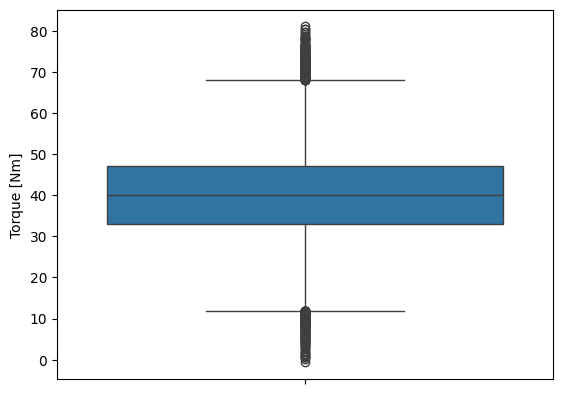

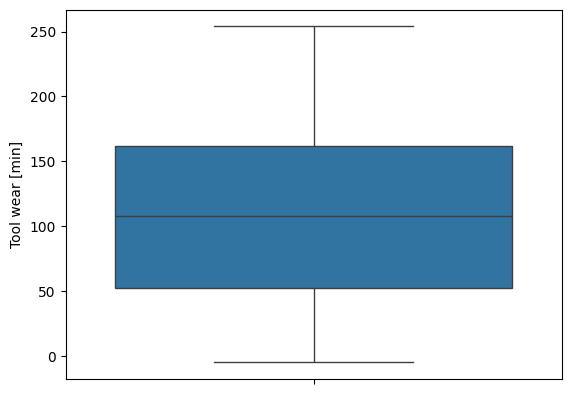

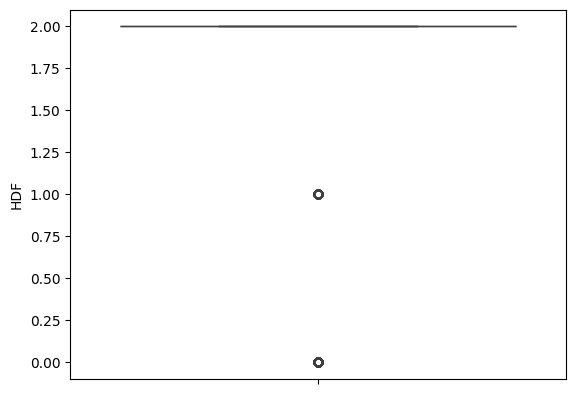

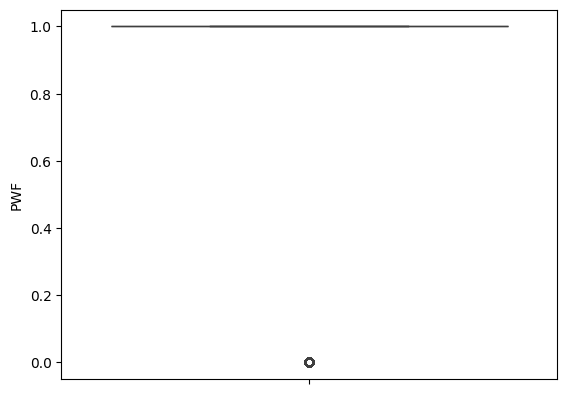

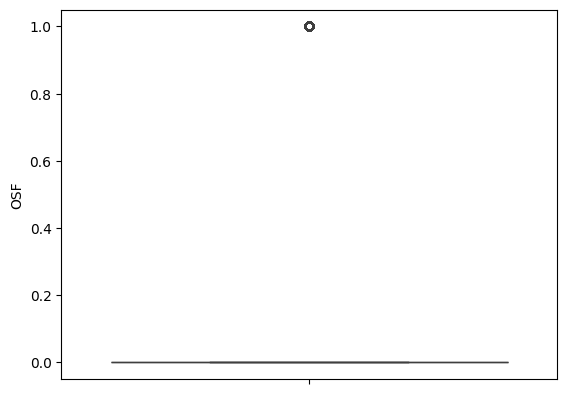

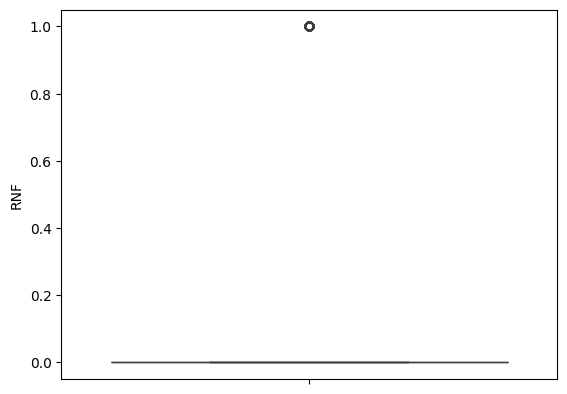

In [ ]:
sns.boxplot(df['Air temperature [K]'])
plt.show()
sns.boxplot(df['Process temperature [K]'])
plt.show()
sns.boxplot(df['Rotational speed [rpm]'])
plt.show()
sns.boxplot(df['Torque [Nm]'])
plt.show()
sns.boxplot(df['Tool wear [min]'])
plt.show()
sns.boxplot(df['HDF'])
plt.show()
sns.boxplot(df['PWF'])
plt.show()
sns.boxplot(df['OSF'])
plt.show()
sns.boxplot(df['RNF'])
plt.show()

In [ ]:
#code to handle outliers
for col in df.columns:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

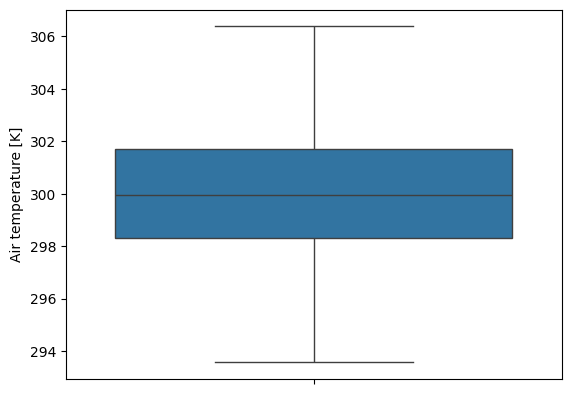

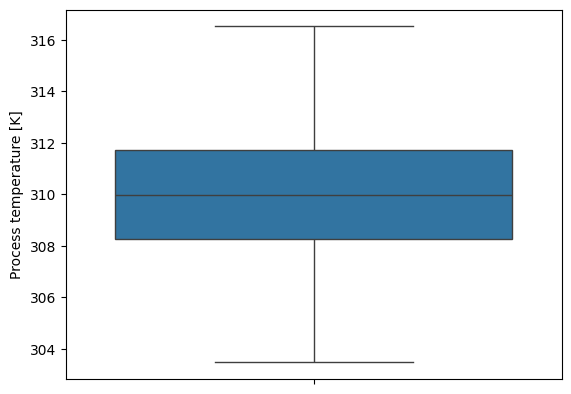

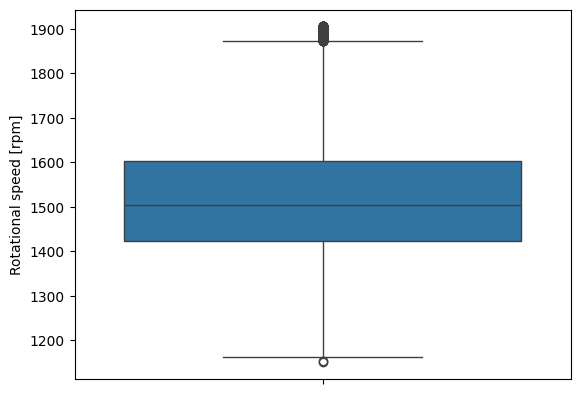

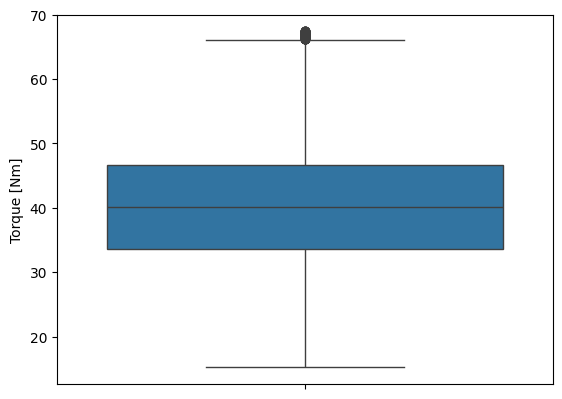

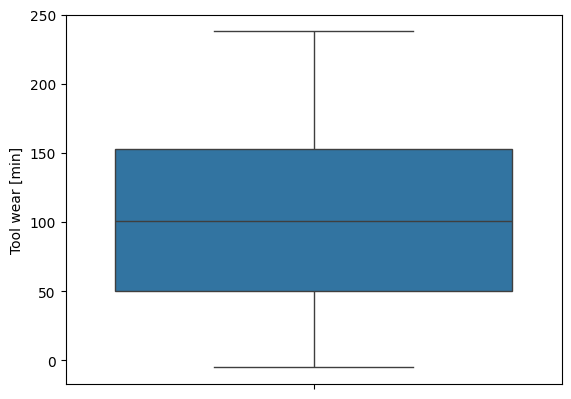

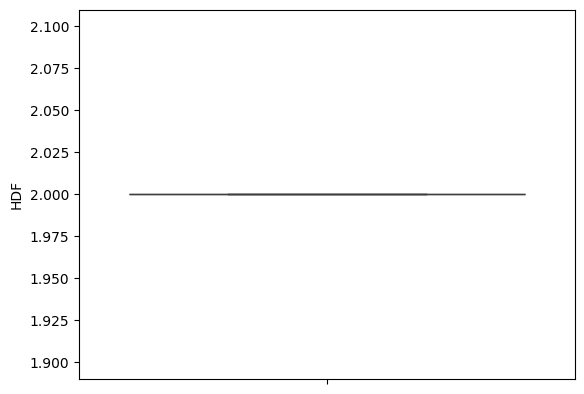

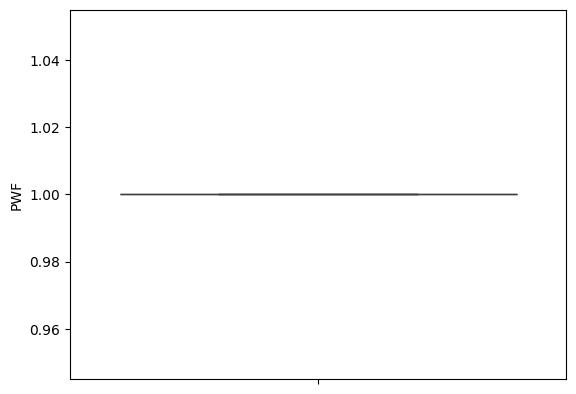

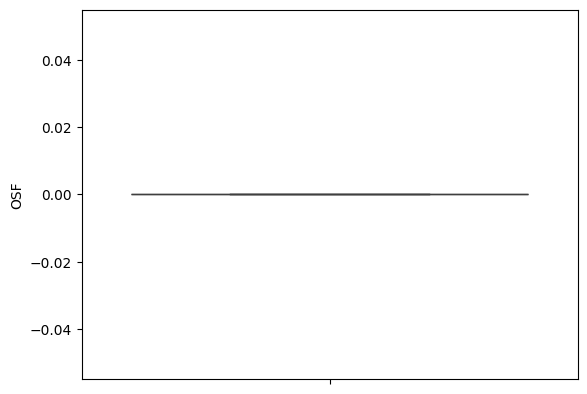

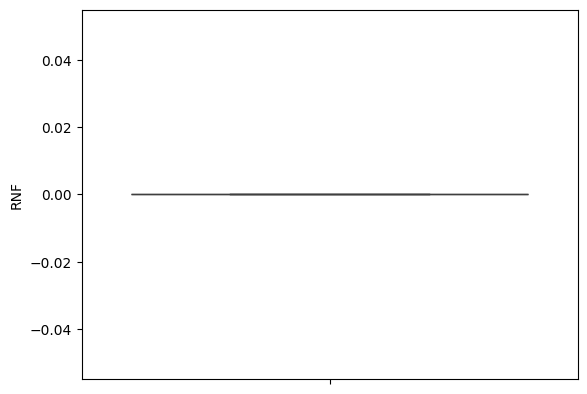

In [ ]:
sns.boxplot(df['Air temperature [K]'])
plt.show()
sns.boxplot(df['Process temperature [K]'])
plt.show()
sns.boxplot(df['Rotational speed [rpm]'])
plt.show()
sns.boxplot(df['Torque [Nm]'])
plt.show()
sns.boxplot(df['Tool wear [min]'])
plt.show()
sns.boxplot(df['HDF'])
plt.show()
sns.boxplot(df['PWF'])
plt.show()
sns.boxplot(df['OSF'])
plt.show()
sns.boxplot(df['RNF'])
plt.show()

In [ ]:
df

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,90501,1,300.697538,310.219698,1506.952744,39.318076,119,1.0,0,2,1,0,0
1,87704,1,299.843397,309.193370,1411.467417,48.388803,203,1.0,0,2,1,0,0
2,78998,2,304.228392,314.057834,1650.031129,35.128204,189,1.0,0,2,1,0,0
3,40590,1,299.673601,310.638137,1330.488549,47.255826,80,1.0,0,2,1,0,0
4,34242,1,304.645486,314.486364,1269.718081,64.618653,115,1.0,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100194,37195,0,301.421708,311.036274,1504.142154,35.277945,38,1.0,0,2,1,0,0
100195,82387,2,298.323806,307.802432,1559.758488,34.202106,110,1.0,0,2,1,0,0
100197,54887,1,300.851066,310.779621,1266.964120,63.515266,103,1.0,0,2,1,0,0
100198,76821,1,301.346005,310.737198,1548.140480,35.433975,122,1.0,0,2,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop('Machine failure' , axis=1)
y=df['Machine failure']
X

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,90501,1,300.697538,310.219698,1506.952744,39.318076,119,0,2,1,0,0
1,87704,1,299.843397,309.193370,1411.467417,48.388803,203,0,2,1,0,0
2,78998,2,304.228392,314.057834,1650.031129,35.128204,189,0,2,1,0,0
3,40590,1,299.673601,310.638137,1330.488549,47.255826,80,0,2,1,0,0
4,34242,1,304.645486,314.486364,1269.718081,64.618653,115,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
100194,37195,0,301.421708,311.036274,1504.142154,35.277945,38,0,2,1,0,0
100195,82387,2,298.323806,307.802432,1559.758488,34.202106,110,0,2,1,0,0
100197,54887,1,300.851066,310.779621,1266.964120,63.515266,103,0,2,1,0,0
100198,76821,1,301.346005,310.737198,1548.140480,35.433975,122,0,2,1,0,0


In [ ]:
y

,Machine failure
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
100194,1.0
100195,1.0
100197,1.0
100198,1.0


In [ ]:
#scale the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
y_scaled=sc.fit_transform(y.values.reshape(-1 ,1))
print(X_scaled)
print(y_scaled)

[[ 1.35936031 -0.33703734  0.29735828 ...  0.          0.
   0.        ]
 [ 1.25199681 -0.33703734 -0.07251758 ...  0.          0.
   0.        ]
 [ 0.91781494  1.32216036  1.82635422 ...  0.          0.
   0.        ]
 ...
 [-0.00769148 -0.33703734  0.36384218 ...  0.          0.
   0.        ]
 [ 0.83425029 -0.33703734  0.5781695  ...  0.          0.
   0.        ]
 [-1.50820874 -0.33703734 -0.22238178 ...  0.          0.
   0.        ]]
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [ ]:
X_train , X_test , y_train , y_test=train_test_split(X , y , test_size=0.2 , random_state=42)

In [ ]:
print("X train shape is :" , X_train.shape)
print("X test shape is :" , X_test.shape)
print("y train shape is :" , y_train.shape)
print("y test shape is :" , y_test.shape)

X train shape is : (64761, 12)
X test shape is : (16191, 12)
y train shape is : (64761,)
y test shape is : (16191,)


In [ ]:
#starting the model training
from keras import Sequential
from keras.layers import Dense , Dropout
from keras.callbacks import EarlyStopping , ModelCheckpoint

In [ ]:

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
early_stop=EarlyStopping(
    monitor='val_loss',
    patience=6,
    restore_best_weights=True ,
    verbose=1
)

In [ ]:
checkpoint=ModelCheckpoint(
    'car_model.keras',
    monitor='val_loss' ,
    save_best_only=True,
    verbose=1

)

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stop, checkpoint])


Epoch 1/10
1601/1619 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9968 - loss: 7.1151
Epoch 1: val_loss improved from inf to 0.00000, saving model to car_model.keras
1619/1619 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9969 - loss: 7.0428 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
1619/1619 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 2: val_loss did not improve from 0.00000
1619/1619 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
1613/1619 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0021
Epoch 3: val_loss did not improve from 0.00000
1619/1619 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
1605/1619 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4: val_loss did not improve from 0.00000
1619/1619 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - a

In [ ]:
loss , accuracy=model.evaluate(X_test , y_test)
print("Test accuraacy " , accuracy)
print("Loss : " , loss)

506/506 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Test accuraacy  1.0
Loss :  0.0


In [ ]:
loss , accuracy=model.evaluate(X_train , y_train)
print("Train accuraacy " , accuracy)
print("Train Loss : " , loss)

2024/2024 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Train accuraacy  1.0
Train Loss :  0.0


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score
y_proba = model.predict(X_test).flatten()

y_pred = (y_proba >= 0.5).astype(int)

print(classification_report(y_test, y_pred))

print("ROC AUC:", roc_auc_score(y_test, y_proba))

506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     16191

    accuracy                           1.00     16191
   macro avg       1.00      1.00      1.00     16191
weighted avg       1.00      1.00      1.00     16191

ROC AUC: nan
